In [1]:
# Cell 1 — 导入依赖 & 构造示例图
import numpy as np
import matplotlib.pyplot as plt

# 随机种子保证实验可复现
np.random.seed(42)

# 假设有 6 个网页，编号 0–5，手动构造它们之间的超链接关系
# adjacency[i,j]=1 表示 j 指向 i（列 j 是出度向下指向的所有行）
A = np.array([
    [0,1,1,0,0,0],  # 页面 0 被 1,2 指向
    [1,0,0,1,0,0],  # 页面 1 被 0,3 指向
    [1,0,0,0,1,0],  # 页面 2 被 0,4 指向
    [0,0,1,0,0,1],  # 页面 3 被 2,5 指向
    [0,0,0,1,0,1],  # 页面 4 被 3,5 指向
    [1,1,0,0,0,0],  # 页面 5 被 0,1 指向
], dtype=float)

# 计算每列（出度）和，将零出度的列视作“跳转到所有节点”
out_deg = A.sum(axis=0)
dangling = (out_deg == 0)
# 构造转移概率矩阵 P：P[i,j] = 概率从 j 跳到 i
P = np.zeros_like(A)
for j in range(A.shape[1]):
    if dangling[j]:
        P[:,j] = 1.0 / A.shape[0]
    else:
        P[:,j] = A[:,j] / out_deg[j]

print("Transition matrix P:\n", P)


Transition matrix P:
 [[0.         0.5        0.5        0.         0.         0.        ]
 [0.33333333 0.         0.         0.5        0.         0.        ]
 [0.33333333 0.         0.         0.         1.         0.        ]
 [0.         0.         0.5        0.         0.         0.5       ]
 [0.         0.         0.         0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.         0.         0.        ]]


In [2]:
# Cell 2 — Power iteration 计算 PageRank
def pagerank(P, alpha=0.85, tol=1e-6, maxiter=100):
    """
    输入：
      P       转移概率矩阵 [N×N]
      alpha   阻尼因子（跳出概率）
      tol     收敛阈值
      maxiter 最大迭代轮数
    输出：
      r       PageRank 向量 [N]
    """
    N = P.shape[0]
    # 初始化 r 为均匀分布
    r = np.ones(N) / N
    # Google 矩阵 G = αP + (1−α)(1/N)11^T
    teleport = np.ones((N,N)) / N
    G = alpha * P + (1 - alpha) * teleport

    for it in range(1, maxiter+1):
        r_new = G @ r
        err = np.linalg.norm(r_new - r, 1)
        r = r_new
        if err < tol:
            print(f"Converged in {it} iterations (L1 error={err:.2e})")
            break
    return r

# 运行 PageRank
r = pagerank(P, alpha=0.85)
print("PageRank scores:\n", r)


Converged in 18 iterations (L1 error=6.77e-07)
PageRank scores:
 [0.17651143 0.14818724 0.20831025 0.17217801 0.1568219  0.13799118]


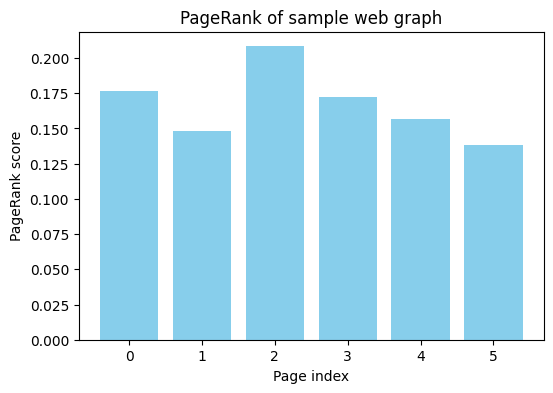

In [3]:
# Cell 3 — 可视化 PageRank 排名
indices = np.arange(len(r))
plt.figure(figsize=(6,4))
plt.bar(indices, r, color='skyblue')
plt.xticks(indices)
plt.xlabel("Page index")
plt.ylabel("PageRank score")
plt.title("PageRank of sample web graph")
plt.show()
